# Ultimate Challenge for Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions!

### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#Import all relevant libraries and packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing

In [2]:
#Convert json file into a dataframe and inspect its outputs
data = pd.read_json("logins.json")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
data.set_index("login_time", inplace=True)
data["login_count"] = 1

data.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


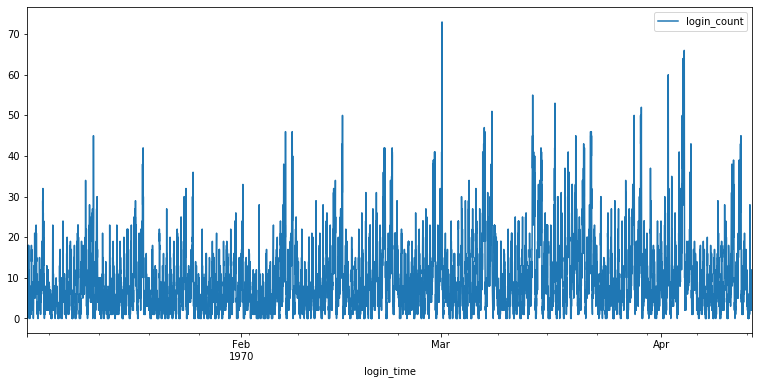

In [5]:
data = data.resample("15T").sum()
data.plot(figsize=(13,6))

plt.show()

In [6]:
data["month"] = data.index.strftime("%B")
data["weekday"] = data.index.weekday_name
data["timestamp"] = data.index.strftime("%H:%M:%S")
data = data.set_index("timestamp")
data.sort_index(ascending=True, inplace=True)

data.head()

,login_count,month,weekday
timestamp,,,
00:00:00,9,March,Wednesday
00:00:00,9,January,Wednesday
00:00:00,31,April,Saturday
00:00:00,11,January,Friday
00:00:00,26,March,Friday


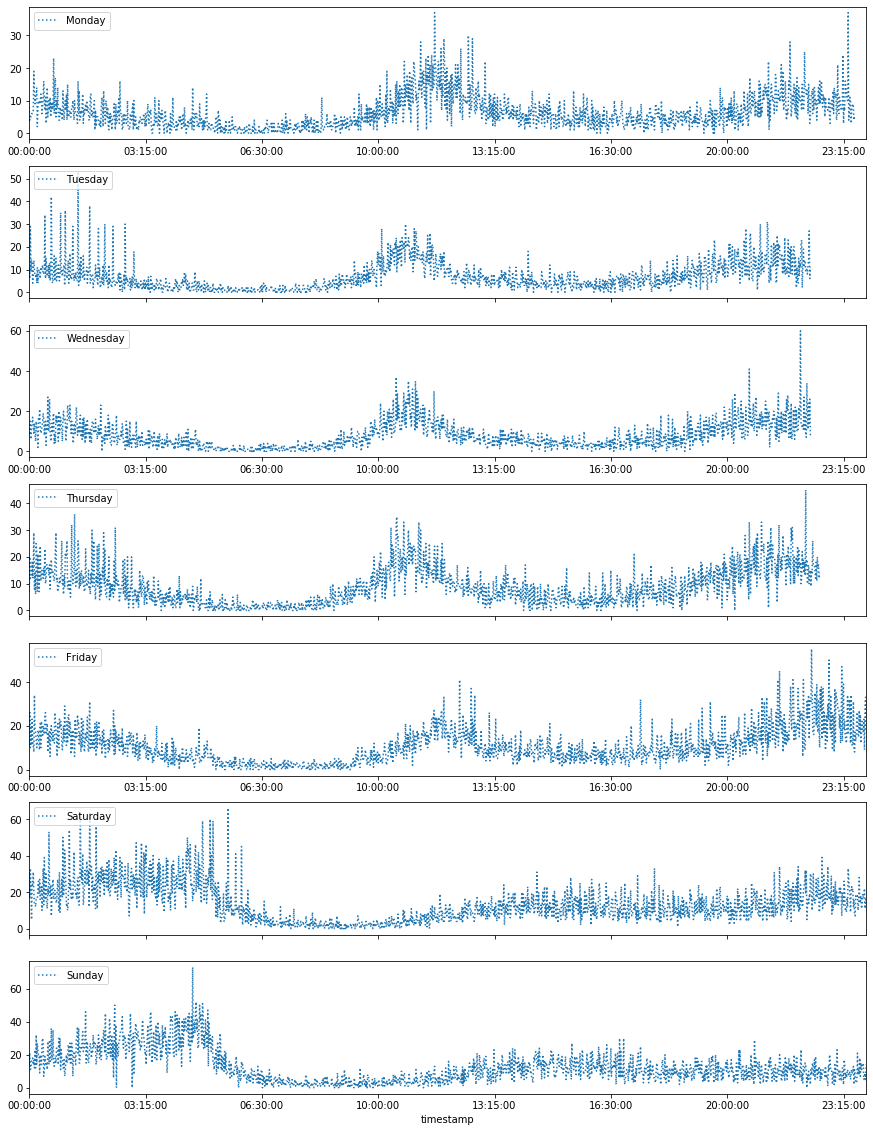

In [7]:
fig, (ax, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(15,20), sharex=True)

data.loc[data.weekday=="Monday", "login_count"].plot(linestyle="dotted", label="Monday", ax=ax)
data.loc[data.weekday=="Tuesday", "login_count"].plot(linestyle="dotted", label="Tuesday", ax=ax2)
data.loc[data.weekday=="Wednesday", "login_count"].plot(linestyle="dotted", label="Wednesday", ax=ax3)
data.loc[data.weekday=="Thursday", "login_count"].plot(linestyle="dotted", label="Thursday", ax=ax4)
data.loc[data.weekday=="Friday", "login_count"].plot(linestyle="dotted", label="Friday", ax=ax5)
data.loc[data.weekday=="Saturday", "login_count"].plot(linestyle="dotted", label="Saturday", ax=ax6)
data.loc[data.weekday=="Sunday", "login_count"].plot(linestyle="dotted", label="Sunday", ax=ax7)

ax.legend(loc="upper left"), ax2.legend(loc="upper left"), ax3.legend(loc="upper left"), 
ax4.legend(loc="upper left"), ax5.legend(loc="upper left"), ax6.legend(loc="upper left"), ax7.legend(loc="upper left")

ax.xaxis.set_tick_params(labelbottom=True), ax3.xaxis.set_tick_params(labelbottom=True), ax5.xaxis.set_tick_params(labelbottom=True)

plt.show()

<div class="alert alert-success" role="alert">
The 24 hour cycle of each week-day and -end from every week and month (i.e., January through March of 1970) above illustrates the peak login hours.  For the weekdays (i.e., Monday through Friday), the peak login times hover around 11:00 AM and 10:00 PM.  However, for weekends (Saturday and Sunday), the peak hours are maintained steadily between 12:00 AM and 5:00 AM.  These peak login hours for each respective day illustrates the time at which demand is the highest.

### Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<div class="alert alert-success" role="alert">
The key measure of success of this experiement would be track the profit of drivers.  If the mean profit increases for drivers, then it means the supply and demand for more drivers at certain times of the day (especially at night for Gotham and during the day for Metropolis) is required for both drivers and riders, and thus will boost the activity/productivity of the working and spending economies of both Gotham and Metropolis.  However, if the mean profit decreases for drivers, then it means that more drivers are making these cross-city trips at a loss due to costs (such as gas or time for other trips) and that the excess supply of drivers are cannabilizing revenues from each other due to insufficient demand.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    + a. how you will implement the experiment
    + b. what statistical test(s) you will conduct to verify the significance of the observation
    + c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

<div class="alert alert-success" role="alert">
One way to test the effectiveness of the city funded tolls would be to split drivers into a control and experimental group.  Splitting half the drivers to a control group (drivers without city funded tolls) and the half to the experiment group (drivers with city funded tolls) will allow us to test our null hypothesis that drivers with city funded tolls see mean increased profits and our alternative hypothesis that drivers with city funded tolls do not see mean increased profits.
<br> </br>

Using the hypothesis test for difference of means, we can set our null hypothesis to state that mean profits from our experiment group is higher than that of controlled group, where μ1 - μ2 > 0.  For our alternative hypothesis, we posit that mean profits from our experiment group is less than or equal to that of the controlled group, where μ1 - μ2 <= 0. Establishing a significance level of 0.05, we can conduct a two-sample t-test of the null hypothesis.
<br> </br>

With the t-statistic, we can obtain the p-value of the two-sample t-test.  If our p-value is above our significance level then we fail to reject the null hypothesis and believe that drivers will in fact see increased profits from the city funded tolls.  However, if our p-value is at or below our significance level, then we reject our null hypothesis and accept our alternative hypothesis that drivers will see decreased or unchanged profits from city funded tolls.  Based on the resulting p-value and its effect on accepting or rejecting the null hypothesis, then I would recommend how to proceed with the experiment of city funded tolls.

### Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

**1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?**

In [8]:
# Convert the json into a workable dataframe
with open("ultimate_data_challenge.json") as data_file:
    df = json.load(data_file)

df = json_normalize(df)

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [9]:
# Inspect the dataframe for number and missing data points
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [10]:
# Clean missing data by filling it with zeros
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

df.avg_rating_of_driver.fillna(0, inplace=True)
df.phone.fillna(0, inplace=True)
df.avg_rating_by_driver.fillna(0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Inspect first and last datetime of dataframe
df.last_trip_date.describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [12]:
# Create retained user column and calculate percent of retained buyers based on activity within the last 30 days
df["retained_user"] = np.where((df.last_trip_date<="2014-07-01") & (df.last_trip_date>="2014-06-01"), 1, 0)
df[["last_trip_date", "retained_user"]]

print('Percent of Retained Users: {}'.format(np.round(df.loc[df.retained_user==1, "retained_user"].sum() / len(df.retained_user) *100, 2)))

Percent of Retained Users: 37.61


**2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.**

In [13]:
model_df = pd.get_dummies(df, prefix_sep='_', drop_first=False)

model_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,city_Astapor,city_King's Landing,city_Winterfell,phone_0,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,0,1,0


In [14]:
model_df.drop(["signup_date", "last_trip_date", "phone_0"], axis=1, inplace=True)
model_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


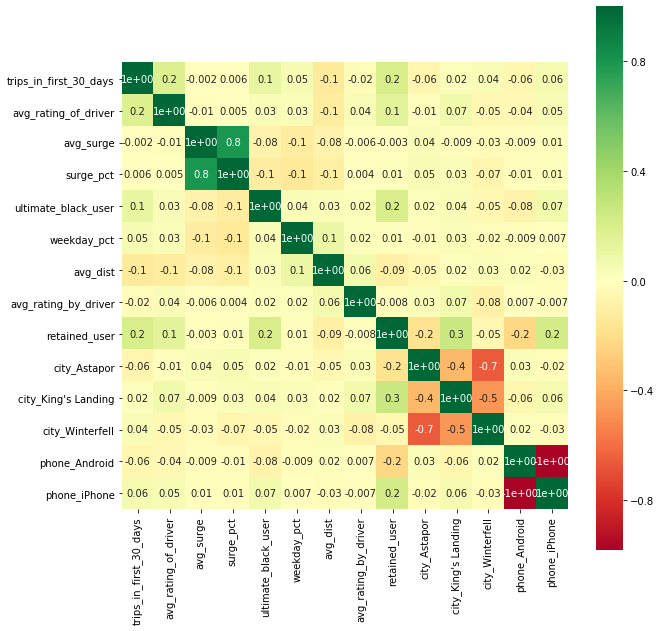

In [15]:
plt.figure(figsize=(10, 10))

ax = sns.heatmap(model_df.corr(), center=0, square=True, annot=True, fmt='.01', cmap="RdYlGn")
ax.set_ylim(14.5-0.5, -0.5)

plt.show()

In [16]:
y = model_df.iloc[:,8]
X = model_df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13]]

X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,1,1,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)

X_scale_train = preprocessing.scale(X_train)
X_scale_test = preprocessing.scale(X_test)

svc = SVC(random_state=42, probability=True, gamma='auto')

result = svc.fit(X_scale_train, y_train)

prediction_test = svc.predict(X_scale_test)

print(metrics.accuracy_score(y_test, prediction_test))

0.7652571428571429


**3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).**

Based on the correlation heatmap results, the most important features for user retention were with users having relatively higher number trips in first 30 days, being an ultimate black user, residing in the city of King's Landing and being an iPhone user. 

That being said, Ultimate should focus in incentivizing ridership and/or discounting costs for the first month so users are more willing to make more trips during their first 30 days.  Additionally, Ultimate should focus on upselling customers toward and focus on increasing ultimate black membership as it also plays a big role in retaining users for 6 months.  The company should also learn what makes King's Landing a different and successful city compared to the other cities where their users live.  Lastly, Ultimate should focus all marketing and growth efforts through iPhone as their users were more likely to be retained, especially since iPhone users are more likely to spend on apps and services than Android users.